<a href="https://colab.research.google.com/github/sriharsha-ramaraju/Winning_Horse_Prediction/blob/master/Horses_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv("/content/drive/My Drive/Colab_Data/Horses.csv") #reading the file 

In [6]:
df.shape #dimmensions of the data

(36819, 46)

In [7]:
df.columns# names of features/columns

Index(['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'JockeyID',
       'AllowanceValue', 'OverweightValue', 'TrainerID', 'OwnerID',
       'LastRunDaysFlat', 'Age', 'Blinkers', 'Hood', 'Visor', 'EyeShield',
       'Eyecover', 'TongueStrap', 'CheekPieces', 'ForecastPrice', 'StatCourse',
       'StatDistance', 'StatCourseDistance', 'StartingPrice', 'Bred', 'DamID',
       'SireID', 'DamSireID', 'Sex', 'Colour', 'YearBorn', 'MeetingID',
       'RaceNumber', 'ScheduledTime', 'HorseCount', 'Runners', 'Going',
       'Weather', 'Course_Distance', 'RaceType', 'TrackType', 'Handicap',
       'eligibility', 'CourseID', 'MeetingDate', 'Won'],
      dtype='object')

In [8]:
df.head(10)#top 10 observastions of the dataset

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
5,989418,2972658,2,3.0,132,1362975.0,NaN,NaN,1188086,1288704.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
6,989418,2972664,12,9.0,132,1140054.0,NaN,NaN,1198584,1490708.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,33/1,SAF,2718050.0,2950716.0,2170153.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
7,989418,2972663,10,1.0,132,1389064.0,NaN,NaN,1143892,1439626.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,50/1,SAF,2884990.0,2908964.0,2170068.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
8,989418,2972659,3,13.0,132,1418973.0,3.0,NaN,1165844,1167965.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14-Jan,NaN,NaN,NaN,16-Jan,SAF,2619919.0,2231546.0,2172473.0,f,ch,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
9,989418,2965595,4,11.0,132,1138258.0,NaN,NaN,1140038,1143873.0,45.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Jan,NaN,NaN,NaN,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


##**number of observastions/percentage of observastions present in each class**

In [9]:

print('Number of observastions in each class:','\n',df.Won.value_counts(),'\n','*'*50)
print('\n','Percentage of observastions in each class:','\n',df.Won.value_counts(normalize=True)*100,'\n','*'*50)


Number of observastions in each class: 
 0    33912
1     2907
Name: Won, dtype: int64 
 **************************************************

 Percentage of observastions in each class: 
 0    92.10462
1     7.89538
Name: Won, dtype: float64 
 **************************************************


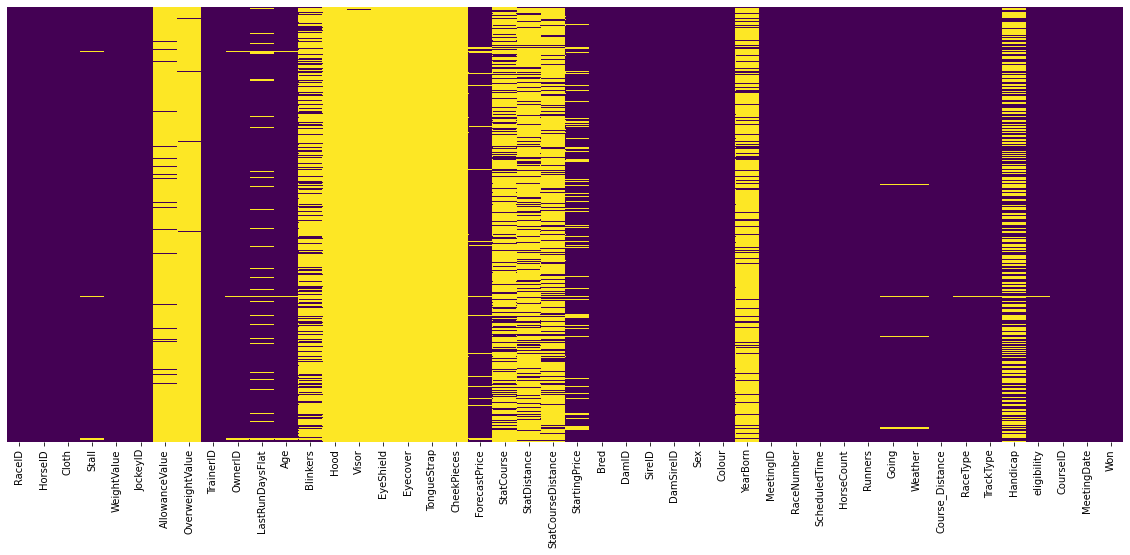

In [10]:
plt.figure(figsize=(20,8))
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

##**Missing values visualisation across each feature. Bright spots (yellow) coresponds to missing values. Features such as Hood, Visor has all values missing. Features such as WeightValue has no missing values**

In [11]:
dnull=df.isnull().sum()/len(df)*100
dnull=dnull.sort_values(ascending=False)
dnull

Hood                  100.000000
EyeShield             100.000000
Eyecover              100.000000
TongueStrap           100.000000
CheekPieces           100.000000
Visor                  99.815313
OverweightValue        99.712105
AllowanceValue         95.629974
YearBorn               85.985497
StatDistance           80.640430
StatCourseDistance     79.749586
StatCourse             76.012385
Blinkers               71.911241
Handicap               52.725495
StartingPrice          13.063907
LastRunDaysFlat         6.841576
ForecastPrice           4.690513
Going                   1.026644
Weather                 1.026644
Stall                   0.554062
OwnerID                 0.551346
Age                     0.551346
eligibility             0.138515
TrackType               0.138515
RaceType                0.138515
Runners                 0.054320
Colour                  0.013580
Sex                     0.013580
DamID                   0.013580
SireID                  0.013580
DamSireID 

**The above missing value visualisation is shown with numbers (each number represents % missing values)**

In [12]:
horse=df.drop(dnull.index[dnull.values>50].to_list()+['RaceID','HorseID','ScheduledTime','RaceType'],axis=1)
horse.head(10)

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
1,13,6.0,132,1165412.0,1188128,1140080.0,NaN,3.0,20-Jan,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
2,9,7.0,132,1239852.0,1199122,1448576.0,NaN,3.0,10-Jan,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
4,11,8.0,132,1354773.0,1140041,1403676.0,24.0,3.0,08-Jan,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
5,2,3.0,132,1362975.0,1188086,1288704.0,NaN,3.0,16-Jan,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
6,12,9.0,132,1140054.0,1198584,1490708.0,NaN,3.0,20-Jan,33/1,SAF,2718050.0,2950716.0,2170153.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
7,10,1.0,132,1389064.0,1143892,1439626.0,NaN,3.0,16-Jan,50/1,SAF,2884990.0,2908964.0,2170068.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
8,3,13.0,132,1418973.0,1165844,1167965.0,NaN,3.0,14-Jan,16-Jan,SAF,2619919.0,2231546.0,2172473.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0


##**Removing the features which are having missing values above 50% and printing the % observastions present in each class**

In [13]:
print('dimmensions after removing features >50% missing values:',horse.shape)
print('class %:','\n',df.Won.value_counts(normalize=True)*100)
print('class counts:','\n',horse.Won.value_counts())

dimmensions after removing features >50% missing values: (36819, 28)
class %: 
 0    92.10462
1     7.89538
Name: Won, dtype: float64
class counts: 
 0    33912
1     2907
Name: Won, dtype: int64


In [14]:
horse.dropna(axis=0,inplace=True)

print('dimmensions after removing missing value observations:',horse.shape)
print('class %:','\n',horse.Won.value_counts(normalize=True)*100)
print('class counts:','\n',horse.Won.value_counts())

dimmensions after removing missing value observations: (29404, 28)
class %: 
 0    90.701945
1     9.298055
Name: Won, dtype: float64
class counts: 
 0    26670
1     2734
Name: Won, dtype: int64


In [15]:
horse.head(10) #after removng the missing values features, top 10 observastions of the data are printed

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
11,5,2.0,132,1414585.0,1188128,1385595.0,24.0,3.0,10-Jan,100/1,SAF,2765587.0,2268827.0,2001595.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
13,6,3.0,132,1370809.0,1188086,1375331.0,152.0,4.0,25-Jan,100/1,SAF,2888286.0,2712483.0,2420665.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
15,1,12.0,132,1418973.0,1165844,1167965.0,12.0,4.0,08-Jan,17-Feb,SAF,2708755.0,2754944.0,2317711.0,c,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
16,5,7.0,132,1384815.0,1289156,1288412.0,12.0,5.0,13-Feb,28-Jan,SAF,2668811.0,2001615.0,2170054.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
17,3,9.0,132,1140012.0,1198584,1422932.0,89.0,4.0,14-Jan,33/1,SAF,2619596.0,2440879.0,2274314.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
18,8,13.0,132,1200677.0,1165857,1167981.0,12.0,4.0,16-Jan,66/1,SAF,2811741.0,2440879.0,2021423.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
19,13,2.0,126,1414585.0,1240064,1188078.0,28.0,3.0,16-Jan,100/1,SAF,2967946.0,2853419.0,2064086.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0


**StartingPrice and ForecastPrice has few values such as 100/1, 55/1 etc, which doesn't make sense. So I am replacing them with mode of the respective column.**

In [0]:
horse.StartingPrice[horse.StartingPrice.str.contains('/1')]=horse.StartingPrice.mode()[0]
horse.ForecastPrice[horse.ForecastPrice.str.contains('/1')]=horse.ForecastPrice.mode()[0]

In [17]:
horse.head(10)

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
11,5,2.0,132,1414585.0,1188128,1385595.0,24.0,3.0,10-Jan,14-Jan,SAF,2765587.0,2268827.0,2001595.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
13,6,3.0,132,1370809.0,1188086,1375331.0,152.0,4.0,25-Jan,14-Jan,SAF,2888286.0,2712483.0,2420665.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
15,1,12.0,132,1418973.0,1165844,1167965.0,12.0,4.0,08-Jan,17-Feb,SAF,2708755.0,2754944.0,2317711.0,c,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
16,5,7.0,132,1384815.0,1289156,1288412.0,12.0,5.0,13-Feb,28-Jan,SAF,2668811.0,2001615.0,2170054.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
17,3,9.0,132,1140012.0,1198584,1422932.0,89.0,4.0,14-Jan,14-Jan,SAF,2619596.0,2440879.0,2274314.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
18,8,13.0,132,1200677.0,1165857,1167981.0,12.0,4.0,16-Jan,14-Jan,SAF,2811741.0,2440879.0,2021423.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
19,13,2.0,126,1414585.0,1240064,1188078.0,28.0,3.0,16-Jan,14-Jan,SAF,2967946.0,2853419.0,2064086.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0


## 1.   **Categorical variables are converted to dummy variables**
## 2.   **ID Variables such as OwnerID, JockeyID which has many levels are now converted to numericals using LabelEncoder(). The same is done to ForecastPrice and StartingPrice**


In [0]:
to_dummies=['Bred','Sex','Colour','TrackType','Weather','Going','eligibility']
horse_dummies=pd.get_dummies(horse[to_dummies],drop_first=True)

horse_final=pd.concat([horse.drop(to_dummies,axis=1),horse_dummies],axis=1)

le_foreprice=LabelEncoder()
le_startprice=LabelEncoder()
le_meetdate=LabelEncoder()
le_meetid=LabelEncoder()
le_joid=LabelEncoder()
le_trid=LabelEncoder()
le_owid=LabelEncoder()
le_dmid=LabelEncoder()
le_siid=LabelEncoder()
le_dmsiid=LabelEncoder()

horse_final.ForecastPrice=le_foreprice.fit_transform(horse_final.ForecastPrice)
horse_final.StartingPrice=le_startprice.fit_transform(horse_final.StartingPrice)
horse_final.MeetingDate=le_meetdate.fit_transform(horse_final.MeetingDate)
horse_final.MeetingID=le_meetid.fit_transform(horse_final.MeetingID)
horse_final.JockeyID=le_joid.fit_transform(horse_final.JockeyID)
horse_final.TrainerID=le_trid.fit_transform(horse_final.TrainerID)
horse_final.OwnerID=le_owid.fit_transform(horse_final.OwnerID)
horse_final.DamID=le_dmid.fit_transform(horse_final.DamID)
horse_final.DamSireID=le_dmsiid.fit_transform(horse_final.DamSireID)
horse_final.SireID=le_dmsiid.fit_transform(horse_final.SireID)

In [19]:
horse_final.head()

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,DamID,SireID,DamSireID,MeetingID,RaceNumber,HorseCount,Runners,Course_Distance,CourseID,MeetingDate,Won,Bred_AUS,Bred_BRZ,Bred_FR,Bred_GB,Bred_GER,Bred_IND,Bred_IRE,Bred_NZ,Bred_SAF,Bred_USA,Bred_ZIM,Sex_f,Sex_g,Sex_h,Sex_m,Colour_b/b,Colour_bl/,Colour_br,Colour_ch,Colour_dkb,Colour_g,Colour_gr,TrackType_Sand,TrackType_Turf,Weather_Fine,Weather_Fine & Sunny,Weather_Fine but Cloudy,Weather_Overcast,Weather_Raining,Weather_Sunny,Weather_Sunny & Warm,Weather_Sunny & Windy,Weather_Sunny Intervals,Weather_Unsettled,Going_Good to Firm,Going_Good to Soft,Going_Heavy,Going_Soft,Going_Soft (Heavy in places),Going_Standard,eligibility_2YO plus,eligibility_3YO only,eligibility_3YO plus,eligibility_4YO plus
0,7,5.0,132,134,74,194,26.0,3.0,40,48,3225,16,430,0,1,13,11.0,1312,380,10,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,12.0,132,148,1,1845,33.0,3.0,18,47,318,60,311,0,1,13,11.0,1312,380,10,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4,11.0,132,25,28,34,45.0,3.0,7,44,3316,127,433,0,1,13,11.0,1312,380,10,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,5,2.0,132,145,70,387,24.0,3.0,27,55,3027,101,95,0,1,13,11.0,1312,380,10,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,6,3.0,132,116,64,329,152.0,4.0,45,55,3638,253,610,0,2,13,13.0,1312,380,10,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
def cohen_d(x,y):
        return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)

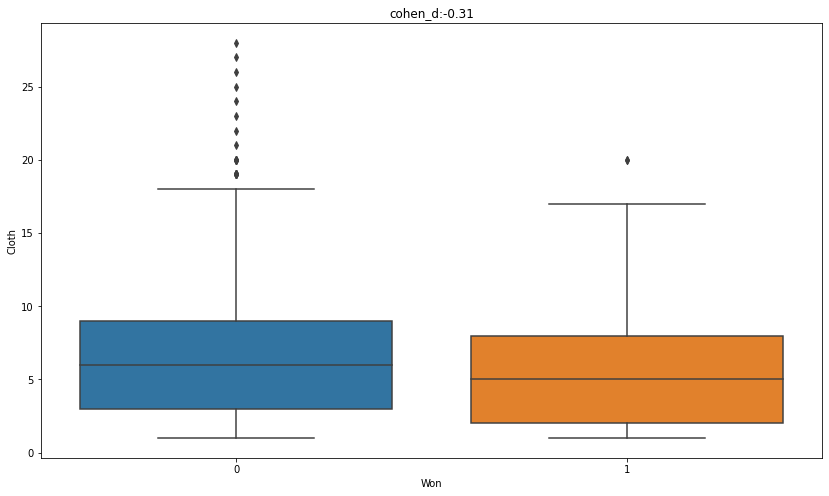

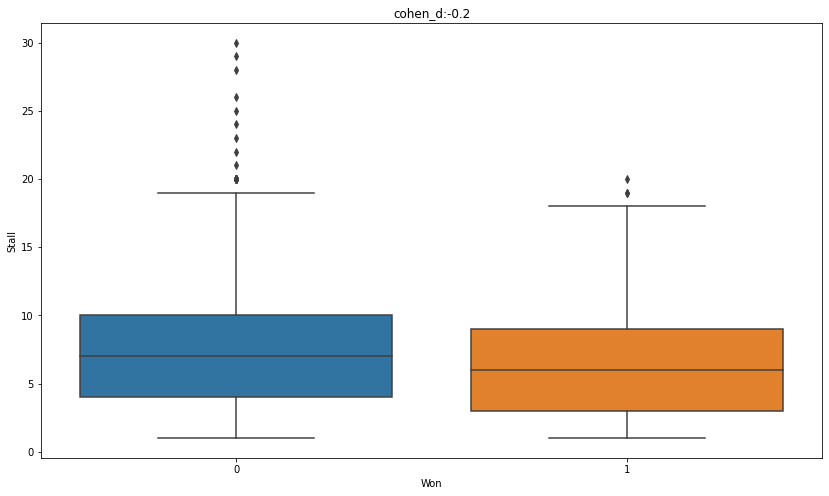

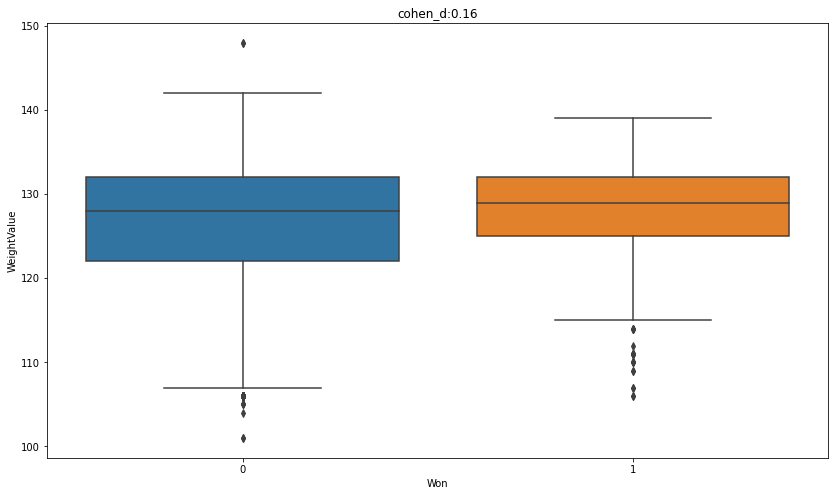

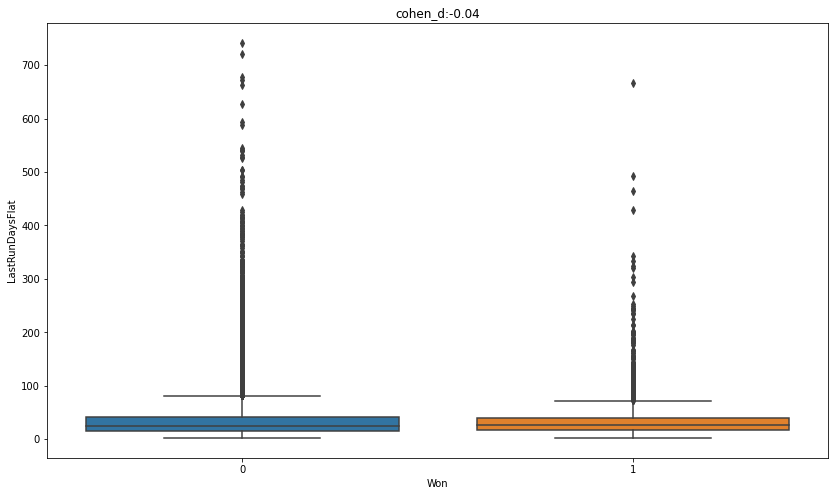

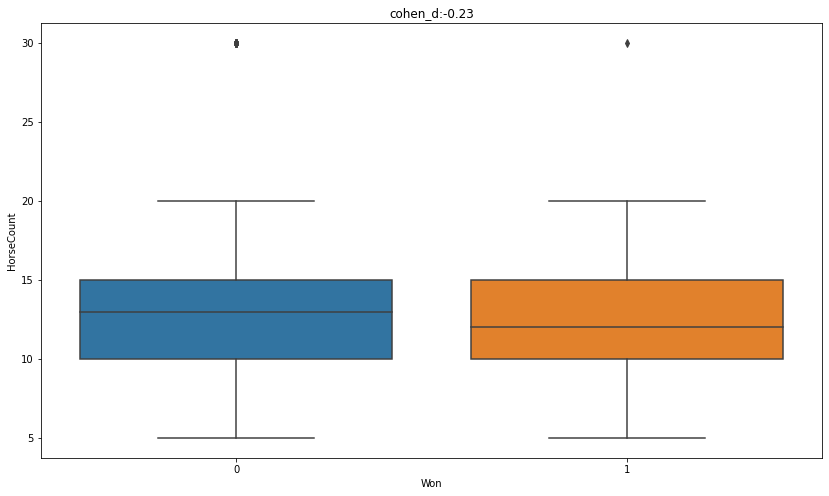

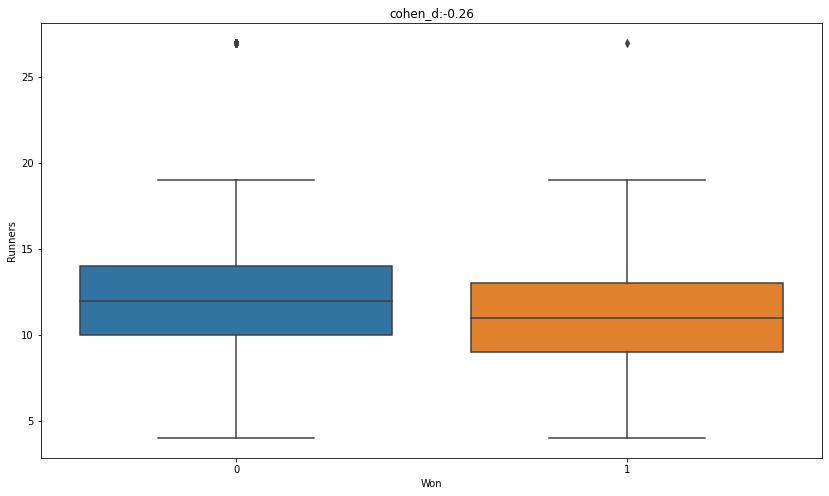

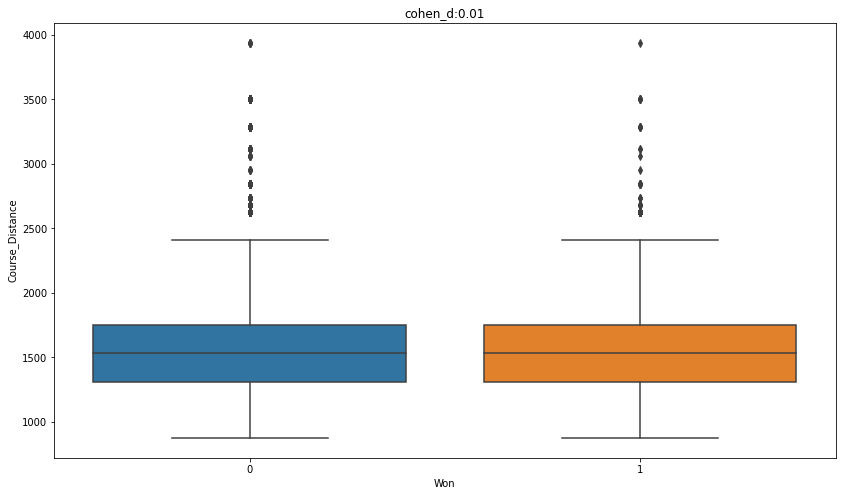

In [64]:
features=['Cloth','Stall','WeightValue','LastRunDaysFlat','HorseCount','Runners','Course_Distance']

for feat in features:
    plt.figure(figsize=(14,8))
    sb.boxplot(y=feat,x='Won',data=horse)
    plt.xlabel('Won')
    plt.ylabel(feat)
    fea=horse[[feat]]
    plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

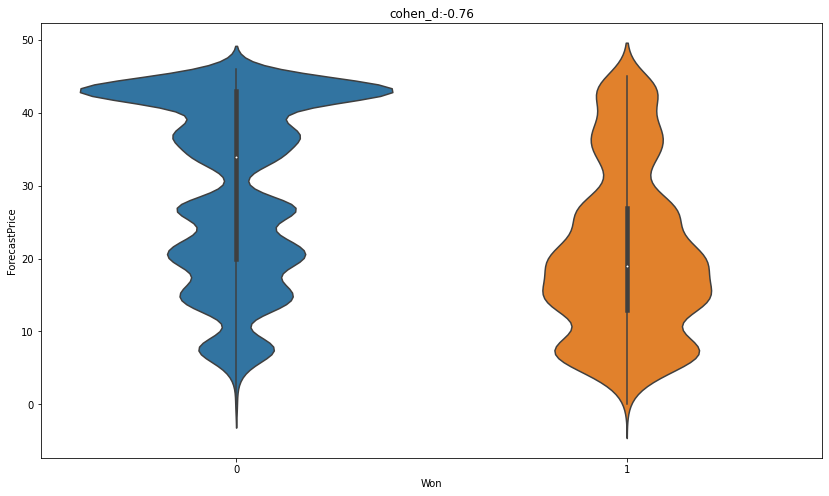

In [71]:
    plt.figure(figsize=(14,8))
    sb.violinplot(y='ForecastPrice',x='Won',data=horse_final)
    plt.xlabel('Won')
    plt.ylabel('ForecastPrice')
    fea=horse_final[['ForecastPrice']]
    plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

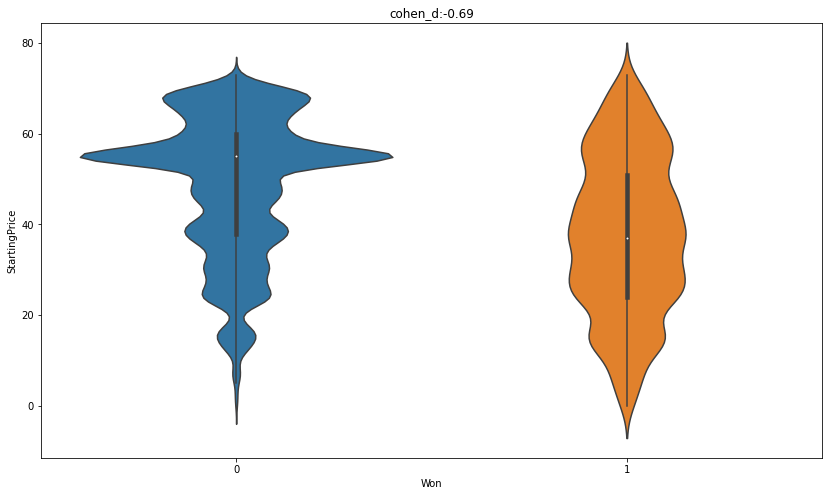

In [72]:
    plt.figure(figsize=(14,8))
    sb.violinplot(y='StartingPrice',x='Won',data=horse_final)
    plt.xlabel('Won')
    plt.ylabel('StartingPrice')
    fea=horse_final[['StartingPrice']]
    plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

##From the above box, violin and Cohen's-d values, it is clear that **ForecastPrice**, **StartingPrice**, Cloth are important variables

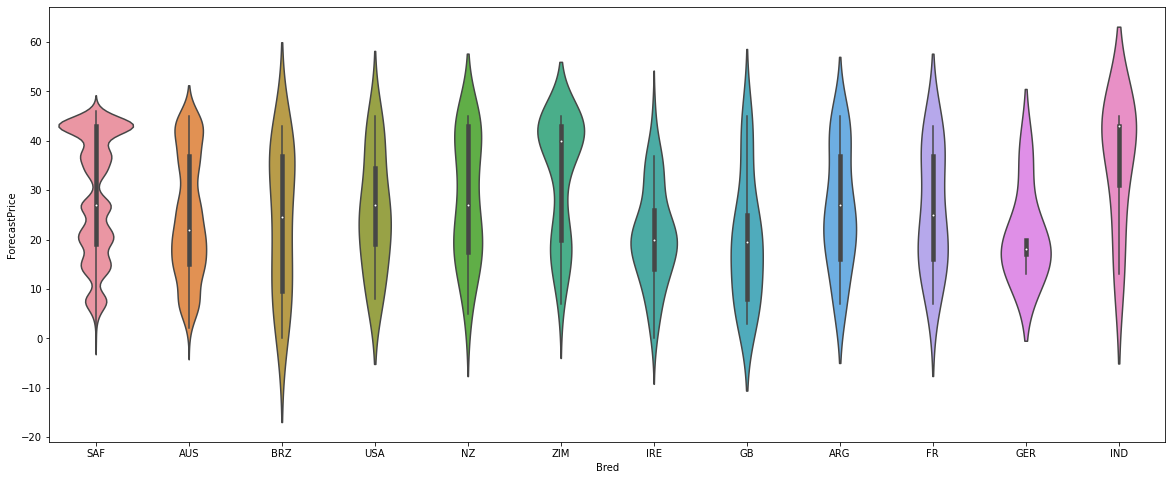

In [84]:
    plt.figure(figsize=(20,8))
    sb.violinplot(y=horse_final['ForecastPrice'],x=horse['Bred'])
    plt.xlabel('Bred')
    plt.ylabel('ForecastPrice')
    # plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

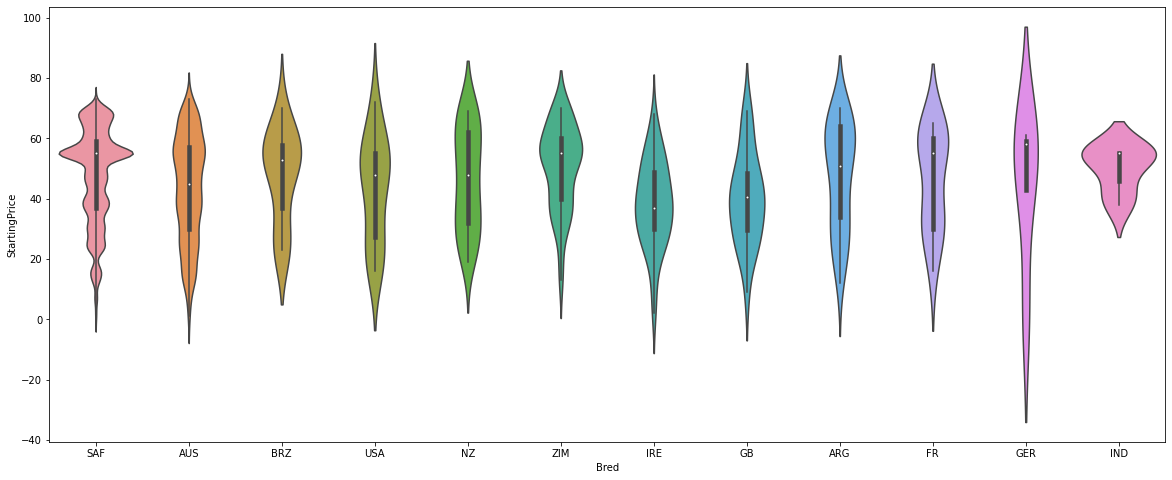

In [85]:
    plt.figure(figsize=(20,8))
    sb.violinplot(y=horse_final['StartingPrice'],x=horse['Bred'])
    plt.xlabel('Bred')
    plt.ylabel('StartingPrice')
    # plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

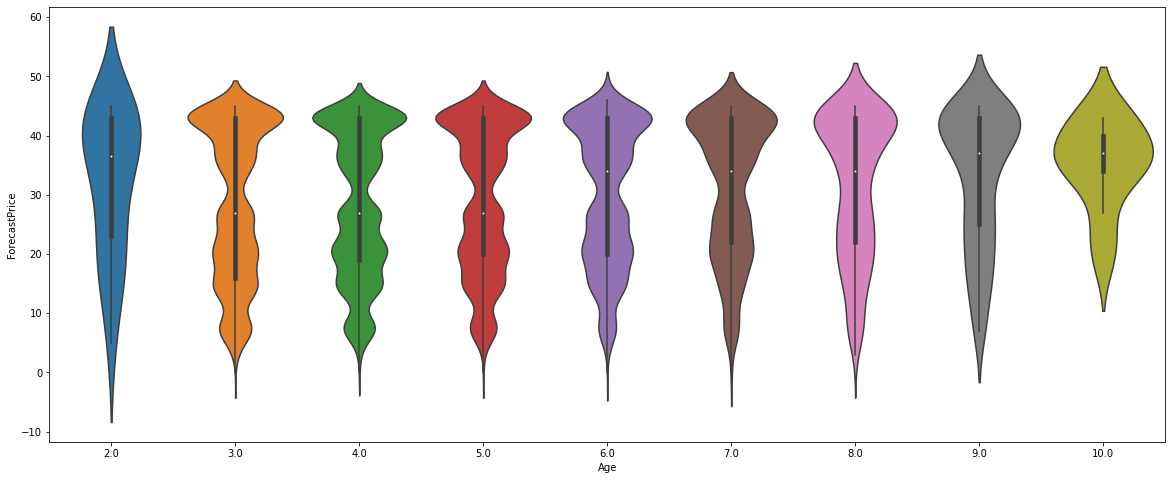

In [83]:
    plt.figure(figsize=(20,8))
    sb.violinplot(y=horse_final['ForecastPrice'],x=horse['Age'])
    plt.xlabel('Age')
    plt.ylabel('ForecastPrice')
    # plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

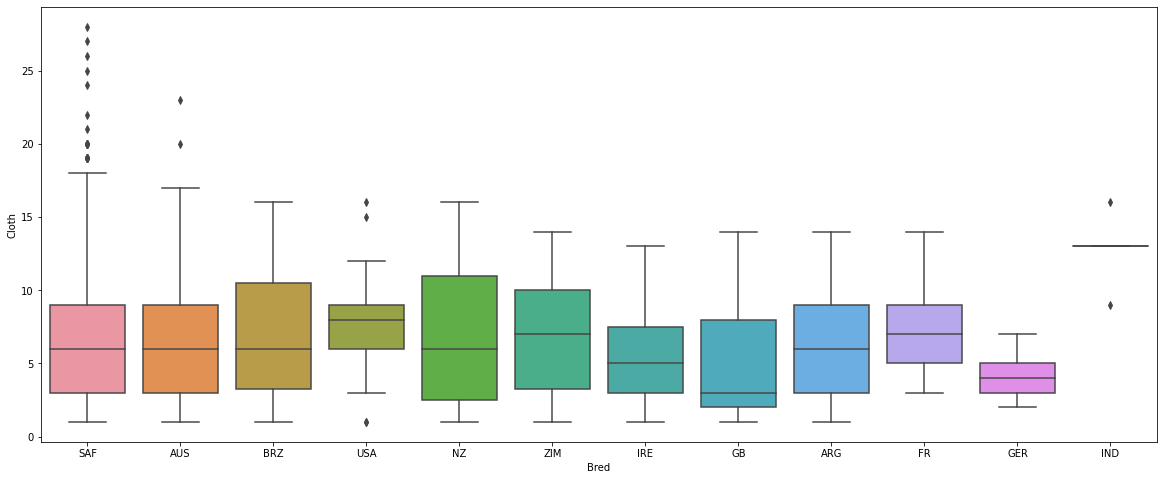

In [88]:
    plt.figure(figsize=(20,8))
    sb.boxplot(y=horse_final['Cloth'],x=horse['Bred'])
    plt.xlabel('Bred')
    plt.ylabel('Cloth')
    # plt.title('cohen_d:'+str(round(cohen_d(fea[horse['Won']==1],fea[horse['Won']==0])[0],2)))
    plt.show()

## 1.   **The data is split into train (85%) and test datsets (15%)**
## 2.   **Train and test data are scaled using standard scaler** 
## 3.   **I also wanted to check how important are ID variables, so I removed them followed by scaling of remaining variables**


In [20]:
x_train,x_test,y_train,y_test=train_test_split(horse_final.drop(['Won'],axis=1),horse_final.Won,
                                               test_size=0.15,stratify=horse_final.Won,random_state=100)
#scaling between mean and 1 std deviation
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

x_train=pd.DataFrame(x_train,columns=horse_final.drop('Won',axis=1).columns)
x_test=pd.DataFrame(x_test,columns=horse_final.drop('Won',axis=1).columns)

x_train_drop=x_train.drop(['OwnerID','TrainerID','JockeyID','DamID','SireID','DamSireID','CourseID','MeetingID','MeetingDate'],axis=1)
x_test_drop=x_test.drop(['OwnerID','TrainerID','JockeyID','DamID','SireID','DamSireID','CourseID','MeetingID','MeetingDate'],axis=1)

print('*'*70,'\n','dimmensions of train data:',x_train.shape,'\n','*'*70)
print('class %:','\n',y_train.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_train.value_counts())

print('\n','*'*70,'\n','dimmensions of test data:',x_test.shape,'\n','*'*70)
print('class %:','\n',y_test.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_test.value_counts())

print('*'*70,'\n','after removal: dimmensions of train data:',x_train_drop.shape,'\n','*'*70)
print('class %:','\n',y_train.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_train.value_counts())

print('\n','*'*70,'\n','after removal: dimmensions of test data:',x_test_drop.shape,'\n','*'*70)
print('class %:','\n',y_test.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_test.value_counts())

********************************************************************** 
 dimmensions of train data: (24993, 64) 
 **********************************************************************
class %: 
 0    90.701396
1     9.298604
Name: Won, dtype: float64 

class counts: 
 0    22669
1     2324
Name: Won, dtype: int64

 ********************************************************************** 
 dimmensions of test data: (4411, 64) 
 **********************************************************************
class %: 
 0    90.705056
1     9.294944
Name: Won, dtype: float64 

class counts: 
 0    4001
1     410
Name: Won, dtype: int64
********************************************************************** 
 after removal: dimmensions of train data: (24993, 55) 
 **********************************************************************
class %: 
 0    90.701396
1     9.298604
Name: Won, dtype: float64 

class counts: 
 0    22669
1     2324
Name: Won, dtype: int64

 *************************************

##**As I do not have any knowledge of features (as it was not provided), I am using machine learning algorithms which throws out variable importance. In machine learning community a minimum F1-Macro (average F1 score) score of 0.5 is accepted (a thumb rule and it's not mandatory).**
##**Decesion Tree and Random Forests gives variable importance and Logistic Regression with L2-Regularisation gives coefficient for each variable**

In [0]:
dct=DecisionTreeClassifier(class_weight='balanced',random_state=100)
rf=RandomForestClassifier(class_weight='balanced',random_state=100)
lr=LogisticRegression(class_weight='balanced',random_state=100)
# svm=SVC(class_weight='balanced',random_state=100)

starcv=StratifiedKFold(n_splits=5)
kfoldcv=KFold(n_splits=5)

dct_params={'max_depth':np.arange(3,15),'criterion':['gini','entropy']}
rf_params={'n_estimators': [100,300,500],'max_depth' : [3,4,5,6],'criterion':['gini','entropy']}
lr_params={'penalty':['l1','l2','elastic'],'C':np.logspace(-4,4,20)}
# svm_params={'C':[1,10,100],'gamma':[1,0.1,0.001]}

##**1. To choose the best parameters for building the algorithm, I used cross validation technique.**

##**2. I used F1 score which is geometric mean of precision and recall scores. F1-Macro is average score of both the classess.**

##**3. To validate my model scores, I used 5-fold cross validation technique to see there is no bias in my scores.**

##**4. To counter the class imbalance problem, I used "class weight" technique, i.e. minority class gets higher weight and majority calss gets lower weight. This means that minority class get highly penalized for mis-classification when compared to majority class.**

In [0]:
dct_grid=GridSearchCV(dct,dct_params,scoring='f1',cv=starcv).fit(x_train,y_train)
lr_grid=GridSearchCV(lr,lr_params,scoring='f1',cv=starcv).fit(x_train,y_train)
rf_grid=GridSearchCV(rf,rf_params,scoring='f1',cv=starcv).fit(x_train,y_train)
# svm_grid=GridSearchCV(svm,svm_params,scoring='f1',cv=starcv).fit(x_train,y_train)

In [0]:
dct_grid_drop=GridSearchCV(dct,dct_params,scoring='f1',cv=starcv).fit(x_train_drop,y_train)
lr_grid_drop=GridSearchCV(lr,lr_params,scoring='f1',cv=starcv).fit(x_train_drop,y_train)
rf_grid_drop=GridSearchCV(rf,rf_params,scoring='f1',cv=starcv).fit(x_train_drop,y_train)
# svm_grid_drop=GridSearchCV(svm,svm_params,scoring='f1',cv=starcv).fit(x_train_drop,y_train)

In [0]:
def model_metrics(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_proba=model.predict_proba(x_test)
    print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
    tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
    print('tn: ',tn,'\t','fp: ',fp)
    print('fn: ',fn,'\t','tp: ',tp)
    # print('\nAccuracy: ',accuracy_score(y_test,y_pred).round(3))
    # print('f1_score: ', f1_score(y_test,y_pred,average=None).round(3))
    # print('recall: ', recall_score(y_test,y_pred,average=None).round(3))
    # print('precision: ', precision_score(y_test,y_pred,average=None).round(3))
    print('auc_score: ', roc_auc_score(y_test,y_proba[:,1]).round(3))
    print('\n')
    print(classification_report(y_test,y_pred,labels=[0,1]))

In [0]:
def model_CVmetrics(model,x_train,y_train):
    scv=StratifiedKFold(n_splits=5,random_state=100)
    kcv=KFold(n_splits=5, random_state=100)
    metrics=['accuracy','f1_macro','recall','precision','roc_auc']
    dfMet=pd.DataFrame()
    dfMet['Stratified_5Fold']=[cross_val_score(model,X=x_train,y=y_train,cv=scv,scoring=met).mean().round(3) for met in metrics]
    dfMet['5-Fold']=[cross_val_score(model,X=x_train,y=y_train,cv=kcv,scoring=met).mean().round(3) for met in metrics]
    dfMet.index=metrics
    print(dfMet)

## **Decision Tree**

In [29]:
model_metrics(dct_grid.best_estimator_,x_test,y_test)

confusion matrix:
 [[2687 1314]
 [ 138  272]]
tn:  2687 	 fp:  1314
fn:  138 	 tp:  272
auc_score:  0.705


              precision    recall  f1-score   support

           0       0.95      0.67      0.79      4001
           1       0.17      0.66      0.27       410

    accuracy                           0.67      4411
   macro avg       0.56      0.67      0.53      4411
weighted avg       0.88      0.67      0.74      4411



In [31]:
model_CVmetrics(dct_grid.best_estimator_,x_train,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.652   0.652
f1_macro              0.524   0.524
recall                0.716   0.716
precision             0.174   0.174
roc_auc               0.727   0.727


In [32]:
model_metrics(dct_grid_drop.best_estimator_,x_test_drop,y_test)

confusion matrix:
 [[2687 1314]
 [ 138  272]]
tn:  2687 	 fp:  1314
fn:  138 	 tp:  272
auc_score:  0.705


              precision    recall  f1-score   support

           0       0.95      0.67      0.79      4001
           1       0.17      0.66      0.27       410

    accuracy                           0.67      4411
   macro avg       0.56      0.67      0.53      4411
weighted avg       0.88      0.67      0.74      4411



In [33]:
model_CVmetrics(dct_grid_drop.best_estimator_,x_train_drop,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.652   0.652
f1_macro              0.524   0.524
recall                0.716   0.716
precision             0.174   0.174
roc_auc               0.727   0.727


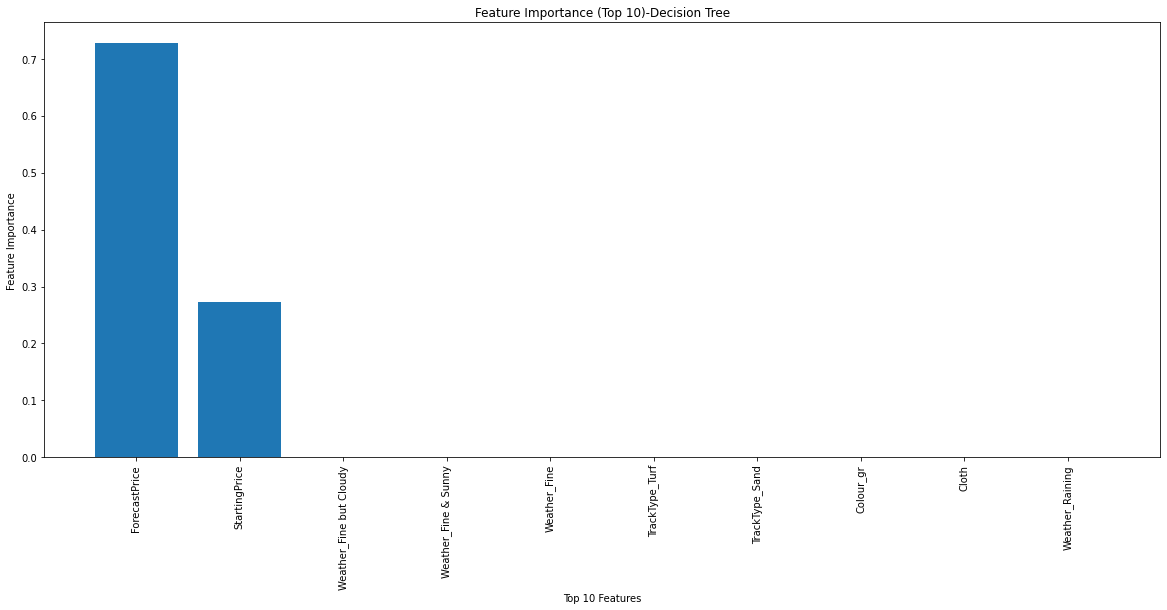

In [30]:
dct_imp=pd.DataFrame(dct_grid.best_estimator_.feature_importances_,index=x_train.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=dct_imp.index[:10],height=dct_imp.importance[:10])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.xlabel('Top 10 Features')
plt.title('Feature Importance (Top 10)-Decision Tree')
plt.show()

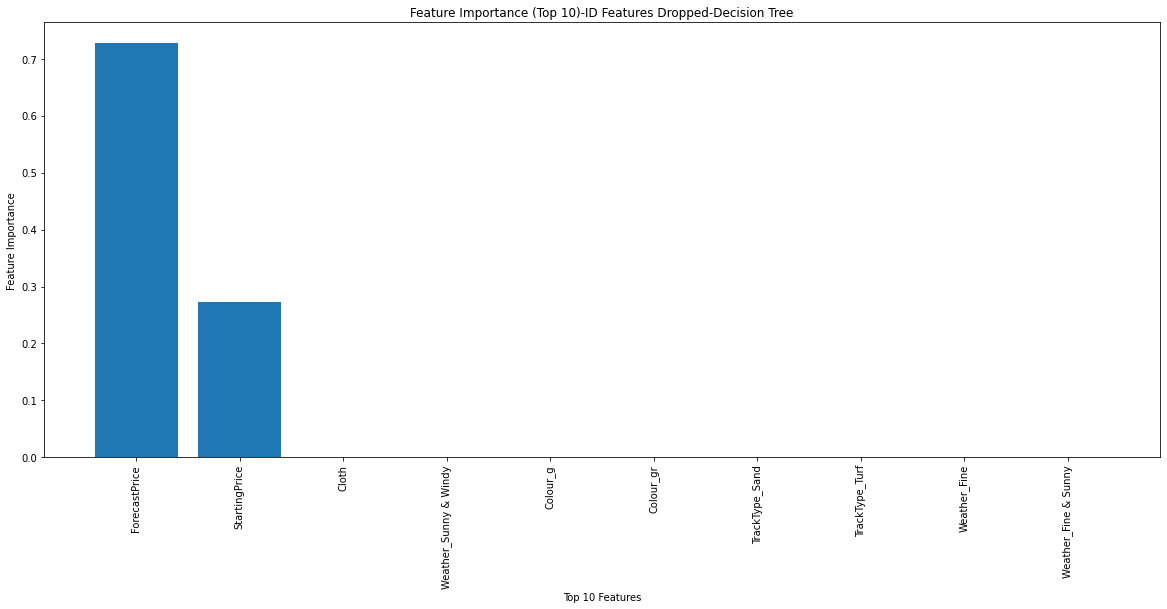

In [31]:
dct_imp_drop=pd.DataFrame(dct_grid_drop.best_estimator_.feature_importances_,index=x_train_drop.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=dct_imp_drop.index[:10],height=dct_imp_drop.importance[:10])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.xlabel('Top 10 Features')
plt.title('Feature Importance (Top 10)-ID Features Dropped-Decision Tree')
plt.show()

In [32]:
dct_grid_top10=GridSearchCV(dct,dct_params,scoring='f1',cv=starcv).fit(x_train_drop[dct_imp_drop.index[:10]],y_train)
model_metrics(dct_grid_top10.best_estimator_,x_test_drop[dct_imp_drop.index[:10]],y_test)

confusion matrix:
 [[2603 1398]
 [ 117  293]]
tn:  2603 	 fp:  1398
fn:  117 	 tp:  293
auc_score:  0.731


              precision    recall  f1-score   support

           0       0.96      0.65      0.77      4001
           1       0.17      0.71      0.28       410

    accuracy                           0.66      4411
   macro avg       0.57      0.68      0.53      4411
weighted avg       0.88      0.66      0.73      4411



##Top 10 features Decision Tree has used to classify the dataset are more are same. **ForecastPrice** and **StartingPrice** are most important features.

                                    precision    recall  f1-score 
        f1_macro(with ID features)       0.56      0.67      0.53
     f1_macro(without ID features)       0.56      0.67      0.53
     f1_macro(without ID features-Top10) 0.57      0.68      0.53

## **Random Forest**

In [39]:
model_metrics(rf_grid.best_estimator_,x_test,y_test)

confusion matrix:
 [[2441 1560]
 [ 113  297]]
tn:  2441 	 fp:  1560
fn:  113 	 tp:  297
auc_score:  0.716


              precision    recall  f1-score   support

           0       0.96      0.61      0.74      4001
           1       0.16      0.72      0.26       410

    accuracy                           0.62      4411
   macro avg       0.56      0.67      0.50      4411
weighted avg       0.88      0.62      0.70      4411



In [40]:
model_CVmetrics(rf_grid.best_estimator_,x_train,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.624   0.625
f1_macro              0.507   0.507
recall                0.737   0.732
precision             0.163   0.163
roc_auc               0.729   0.729


In [41]:
model_metrics(rf_grid_drop.best_estimator_,x_test_drop,y_test)

confusion matrix:
 [[2412 1589]
 [ 116  294]]
tn:  2412 	 fp:  1589
fn:  116 	 tp:  294
auc_score:  0.716


              precision    recall  f1-score   support

           0       0.95      0.60      0.74      4001
           1       0.16      0.72      0.26       410

    accuracy                           0.61      4411
   macro avg       0.56      0.66      0.50      4411
weighted avg       0.88      0.61      0.69      4411



In [42]:
model_CVmetrics(rf_grid_drop.best_estimator_,x_train_drop,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.618   0.619
f1_macro              0.504   0.504
recall                0.744   0.741
precision             0.162   0.162
roc_auc               0.729   0.729


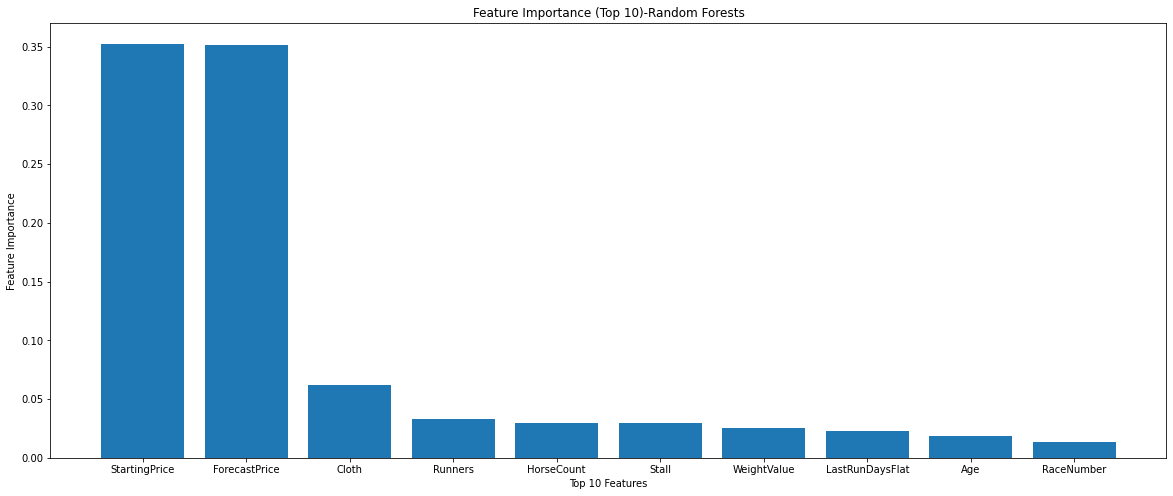

In [33]:
rf_imp=pd.DataFrame(rf_grid_drop.best_estimator_.feature_importances_,index=x_train_drop.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=rf_imp.index[:10],height=rf_imp.importance[:10])
plt.ylabel('Feature Importance')
plt.xlabel('Top 10 Features')
plt.title('Feature Importance (Top 10)-Random Forests')
plt.show()

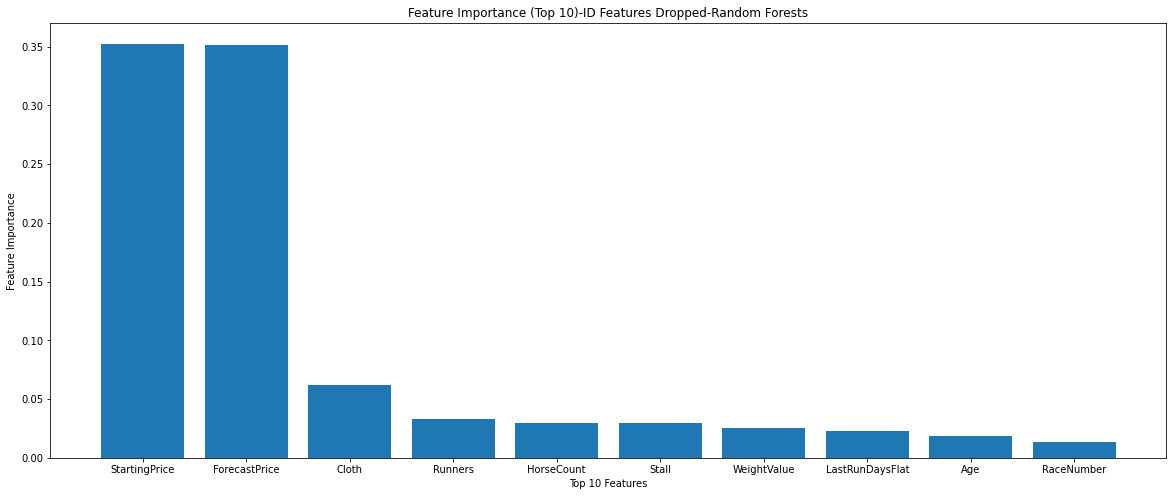

In [34]:
rf_imp_drop=pd.DataFrame(rf_grid_drop.best_estimator_.feature_importances_,index=x_train_drop.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=rf_imp_drop.index[:10],height=rf_imp.importance[:10])
plt.ylabel('Feature Importance')
plt.xlabel('Top 10 Features')
plt.title('Feature Importance (Top 10)-ID Features Dropped-Random Forests')
plt.show()

In [35]:
rf_grid_top10=GridSearchCV(rf,rf_params,scoring='f1',cv=starcv).fit(x_train_drop[rf_imp_drop.index[:10]],y_train)
model_metrics(rf_grid_top10.best_estimator_,x_test_drop[rf_imp_drop.index[:10]],y_test)

confusion matrix:
 [[2510 1491]
 [ 116  294]]
tn:  2510 	 fp:  1491
fn:  116 	 tp:  294
auc_score:  0.733


              precision    recall  f1-score   support

           0       0.96      0.63      0.76      4001
           1       0.16      0.72      0.27       410

    accuracy                           0.64      4411
   macro avg       0.56      0.67      0.51      4411
weighted avg       0.88      0.64      0.71      4411



##Top 10 features Random Forests has used to classify the dataset are more are same. **ForecastPrice** and **StartingPrice** are most important features.

                                    precision    recall  f1-score 
    f1_macro(with ID features)          0.56      0.67      0.50
    f1_macro(without ID features)       0.56      0.66      0.50
    f1_macro(without ID features-Top10) 0.56      0.64      0.51

## **Logistic Regression**

In [43]:
model_metrics(lr_grid.best_estimator_,x_test,y_test)

confusion matrix:
 [[2595 1406]
 [ 133  277]]
tn:  2595 	 fp:  1406
fn:  133 	 tp:  277
auc_score:  0.713


              precision    recall  f1-score   support

           0       0.95      0.65      0.77      4001
           1       0.16      0.68      0.26       410

    accuracy                           0.65      4411
   macro avg       0.56      0.66      0.52      4411
weighted avg       0.88      0.65      0.72      4411



In [44]:
model_CVmetrics(lr_grid.best_estimator_,x_train,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.657   0.656
f1_macro              0.524   0.524
recall                0.696   0.695
precision             0.170   0.170
roc_auc               0.725   0.725


In [45]:
model_metrics(lr_grid_drop.best_estimator_,x_test_drop,y_test)

confusion matrix:
 [[2603 1398]
 [ 131  279]]
tn:  2603 	 fp:  1398
fn:  131 	 tp:  279
auc_score:  0.713


              precision    recall  f1-score   support

           0       0.95      0.65      0.77      4001
           1       0.17      0.68      0.27       410

    accuracy                           0.65      4411
   macro avg       0.56      0.67      0.52      4411
weighted avg       0.88      0.65      0.73      4411



In [46]:
model_CVmetrics(lr_grid_drop.best_estimator_,x_train_drop,y_train)

           Stratified_5Fold  5-Fold
accuracy              0.656   0.656
f1_macro              0.524   0.524
recall                0.694   0.694
precision             0.170   0.170
roc_auc               0.725   0.725


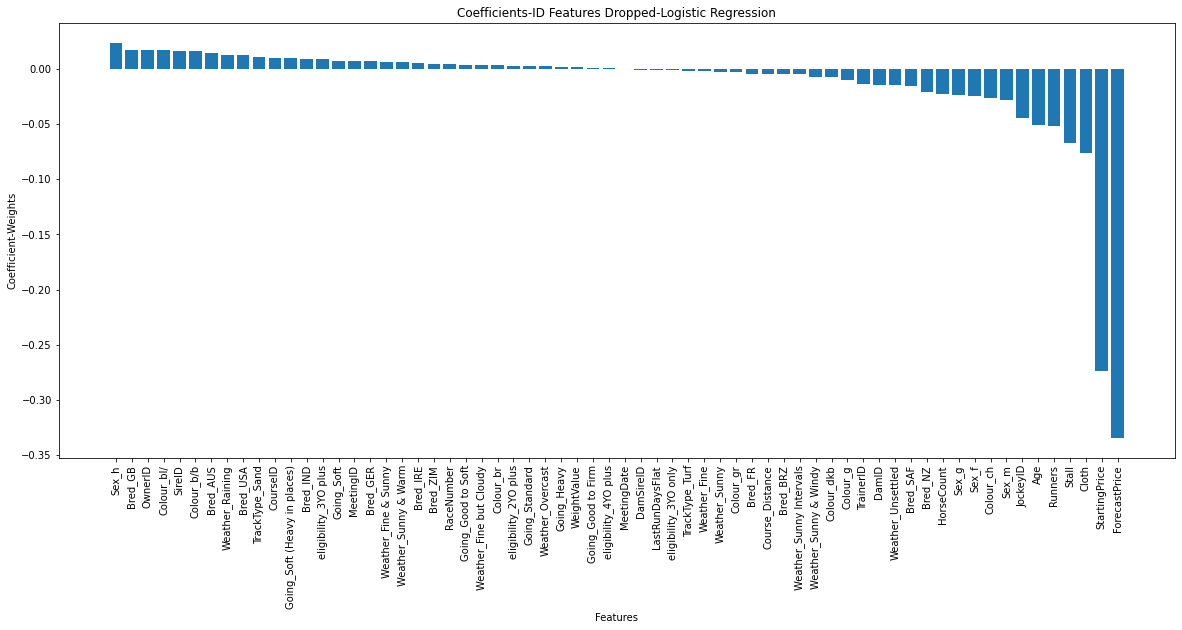

In [37]:
lr_imp=pd.DataFrame(np.transpose(lr_grid.best_estimator_.coef_),index=x_train.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=lr_imp.index,height=lr_imp.importance)
plt.xticks(rotation=90)
plt.ylabel('Coefficient-Weights')
plt.xlabel('Features')
plt.title('Coefficients-ID Features Dropped-Logistic Regression')
plt.show()

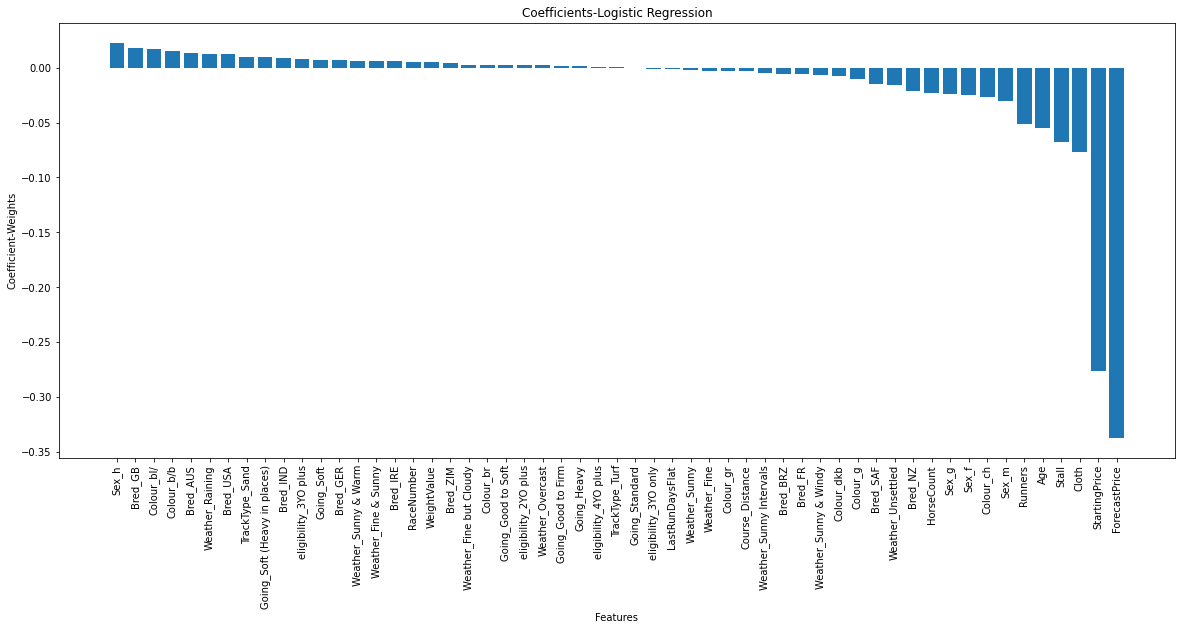

In [38]:
lr_imp_drop=pd.DataFrame(np.transpose(lr_grid_drop.best_estimator_.coef_),index=x_train_drop.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=lr_imp_drop.index,height=lr_imp_drop.importance)
plt.xticks(rotation=90)
plt.ylabel('Coefficient-Weights')
plt.xlabel('Features')
plt.title('Coefficients-Logistic Regression')
plt.show()

In [46]:
lr_imp_drop.abs().sort_values('importance',ascending=False).index[:10]

Index(['ForecastPrice', 'StartingPrice', 'Cloth', 'Stall', 'Age', 'Runners',
       'Sex_m', 'Colour_ch', 'Sex_f', 'Sex_g'],
      dtype='object')

In [47]:
lr_grid_top10=GridSearchCV(lr,lr_params,scoring='f1',cv=starcv).fit(x_train_drop[lr_imp_drop.abs().sort_values('importance',ascending=False).index[:10]],y_train)
model_metrics(lr_grid_top10.best_estimator_,x_test_drop[lr_imp_drop.abs().sort_values('importance',ascending=False).index[:10]],y_test)

confusion matrix:
 [[2587 1414]
 [ 129  281]]
tn:  2587 	 fp:  1414
fn:  129 	 tp:  281
auc_score:  0.716


              precision    recall  f1-score   support

           0       0.95      0.65      0.77      4001
           1       0.17      0.69      0.27       410

    accuracy                           0.65      4411
   macro avg       0.56      0.67      0.52      4411
weighted avg       0.88      0.65      0.72      4411



##Top 10 features Logistic Regression has used to classify the dataset are more are same. **ForecastPrice** and **StartingPrice** are most important features.

                                     precision    recall  f1-score 
    with ID features                    0.56      0.66      0.52
    without ID features                 0.56      0.67      0.52
    Only Top 10 features                0.56      0.67      0.52

# **Average Precision, Recall and F1-score for three different models**

     **Decision Tree**                 precision recall   f1-score
     with ID features                    0.56      0.67      0.53
     without ID features                 0.56      0.67      0.53
     Only Top 10 features                0.57      0.68      0.53

     **Random Forests**                precision  recall  f1-score 
     with ID features                     0.56      0.67      0.50
     without ID features                  0.56      0.66      0.50
     nly Top 10 features                  0.56      0.64      0.51

     **Logistic Regression**           precision  recall  f1-score 
     with ID features                     0.56      0.66      0.52
     without ID features                  0.56      0.67      0.52
     Only Top 10 features                 0.56      0.67      0.52

# **Future Improvements**


1.   Knowing more about the features will defnitely help in feature Engineering
2.   Especially, ForecastPrice and StartingPrice are most important features as predicted by models. 
3.   Using ensemble modelling: Predicting the probabilities for all the observastions using each model and the using those probabilites to predict the outcome class, i.e.e two level model
4.   Can extract seasonal information from Forecast and Sarting prices and use that information for predicting the winning horse

